# DSN AI HACKATHON

In [1]:
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Colab_Notebooks/DSN_AI_HACKATHON

/content/drive/MyDrive/Colab_Notebooks/DSN_AI_HACKATHON


In [3]:
project_dir = os.getcwd()
data_dir = project_dir + '/Data'

## Import Necessary Libraries

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tf_keras as keras
import random
import tensorflow as tf
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [5]:
# Set Seed
_seed = 42

np.random.seed(_seed)
random.seed(_seed)
tf.random.set_seed(_seed)

## Load in Data

In [6]:
train_data = pd.read_csv(data_dir+'/bluechip-summit-credit-worthiness-prediction/Train.csv')
test_data = pd.read_csv(data_dir+'/bluechip-summit-credit-worthiness-prediction/Test.csv')

In [7]:
train_data.head()

,ID,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,74768,LP002231,1,1,0,1,0,8328,0.000000,17,363,1,2,1,6000
1,79428,LP001448,1,1,0,0,0,150,3857.458782,188,370,1,1,0,6000
2,70497,LP002231,0,0,0,0,0,4989,314.472511,17,348,1,0,0,6000
3,87480,LP001385,1,1,0,0,0,150,0.000000,232,359,1,1,1,3750
4,33964,LP002231,1,1,1,0,0,8059,0.000000,17,372,1,0,1,3750


## Visualize Train Data

In [ ]:
train_data.shape

(5898, 15)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5898 entries, 0 to 5897
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 5898 non-null   int64  
 1   Loan_ID            5898 non-null   object 
 2   Gender             5898 non-null   int64  
 3   Married            5898 non-null   int64  
 4   Dependents         5898 non-null   object 
 5   Education          5898 non-null   int64  
 6   Self_Employed      5898 non-null   int64  
 7   ApplicantIncome    5898 non-null   int64  
 8   CoapplicantIncome  5898 non-null   float64
 9   LoanAmount         5898 non-null   int64  
 10  Loan_Amount_Term   5898 non-null   int64  
 11  Credit_History     5898 non-null   int64  
 12  Property_Area      5898 non-null   int64  
 13  Loan_Status        5898 non-null   int64  
 14  Total_Income       5898 non-null   int64  
dtypes: float64(1), int64(12), object(2)
memory usage: 691.3+ KB


In [ ]:
# Check for missing values in the dataset
train_data.isna().sum()

,0
ID,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0


In [ ]:
train_data.describe()

,ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
count,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000
mean,54964.183452,0.910817,0.854527,0.120210,0.107664,7782.026958,1245.954548,97.410478,359.114954,0.920482,1.183961,0.832994,5239.284503
std,26133.640949,0.285032,0.352607,0.325235,0.309981,9182.571831,2368.012349,103.483478,48.876088,0.270569,0.730568,0.373013,2308.679455
min,10002.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,17.000000,12.000000,0.000000,0.000000,0.000000,1963.000000
25%,32337.000000,1.000000,1.000000,0.000000,0.000000,2342.250000,0.000000,17.000000,357.000000,1.000000,1.000000,1.000000,3750.000000
50%,55501.000000,1.000000,1.000000,0.000000,0.000000,6989.000000,117.562275,42.000000,368.000000,1.000000,1.000000,1.000000,6000.000000
75%,77775.750000,1.000000,1.000000,0.000000,0.000000,8375.000000,1680.894542,174.000000,372.000000,1.000000,2.000000,1.000000,6000.000000
max,99998.000000,1.000000,1.000000,1.000000,1.000000,81000.000000,20000.000000,700.000000,480.000000,1.000000,2.000000,1.000000,22500.000000


In [ ]:
train_data.head()

,ID,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,74768,LP002231,1,1,0,1,0,8328,0.000000,17,363,1,2,1,6000
1,79428,LP001448,1,1,0,0,0,150,3857.458782,188,370,1,1,0,6000
2,70497,LP002231,0,0,0,0,0,4989,314.472511,17,348,1,0,0,6000
3,87480,LP001385,1,1,0,0,0,150,0.000000,232,359,1,1,1,3750
4,33964,LP002231,1,1,1,0,0,8059,0.000000,17,372,1,0,1,3750


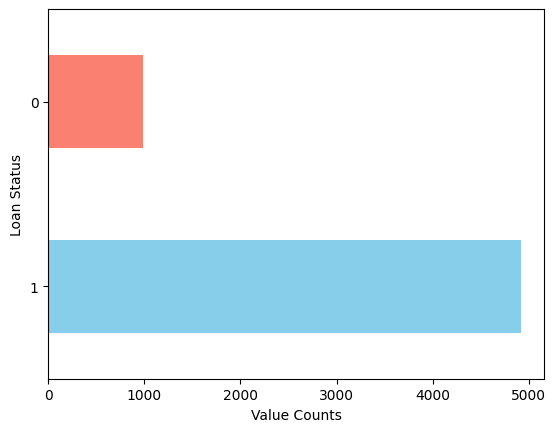

In [ ]:
# Check labels count
counts = train_data.Loan_Status.value_counts()
counts.plot(kind='barh', color=['skyblue', 'salmon'])
plt.ylabel('Loan Status')
plt.xlabel('Value Counts')
plt.show()

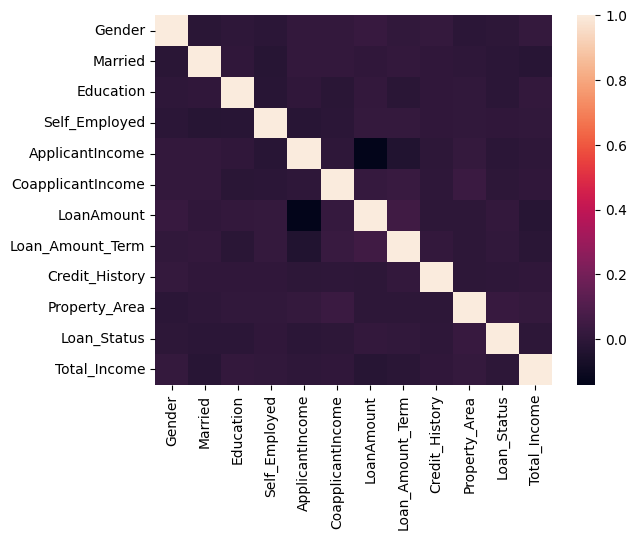

In [ ]:
# Plot Correlation Matrix
sns.heatmap(train_data.drop(['Loan_ID', 'ID', 'Dependents'], axis=1).corr());

In [ ]:
train_data.columns

Index(['ID', 'Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Total_Income'],
      dtype='object')

In [ ]:
train_data.Dependents.value_counts()

,count
Dependents,
0,3659
1,1157
3+,546
2,536


The Dependents feature has to be converted into numerical representation

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5898 entries, 0 to 5897
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 5898 non-null   int64  
 1   Loan_ID            5898 non-null   object 
 2   Gender             5898 non-null   int64  
 3   Married            5898 non-null   int64  
 4   Dependents         5898 non-null   object 
 5   Education          5898 non-null   int64  
 6   Self_Employed      5898 non-null   int64  
 7   ApplicantIncome    5898 non-null   int64  
 8   CoapplicantIncome  5898 non-null   float64
 9   LoanAmount         5898 non-null   int64  
 10  Loan_Amount_Term   5898 non-null   int64  
 11  Credit_History     5898 non-null   int64  
 12  Property_Area      5898 non-null   int64  
 13  Loan_Status        5898 non-null   int64  
 14  Total_Income       5898 non-null   int64  
dtypes: float64(1), int64(12), object(2)
memory usage: 691.3+ KB


In [ ]:
train_data['Loan_Status'].value_counts()

,count
Loan_Status,
1,4913
0,985


## Data Preprocessing

In [8]:
train_data.head(1)

,ID,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,74768,LP002231,1,1,0,1,0,8328,0.0,17,363,1,2,1,6000


In [9]:
# Split into features and labels
x = train_data.drop(['ID', 'Loan_ID', 'Loan_Status'], axis=1)
y = train_data['Loan_Status']

In [10]:
x.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income
0,1,1,0,1,0,8328,0.0,17,363,1,2,6000


In [11]:
class Preprocessing:
    '''
    A class to preprocess a dataset by performing tasks such as encoding categorical
    features and scaling numerical features.

    Attributes:
        data (pd.DataFrame): The input dataset to be preprocessed.
    '''

    def __init__(self, data):
        '''
        Initializes the Preprocessing class with the provided dataset.

        Args:
            data (pd.DataFrame): The input dataset to be preprocessed.
        '''
        self.data = data

    def numerically_encoding_dependents_feature(self):
        '''
        Encodes the 'Dependents' feature in the dataset with numerical values.

        The mapping used is as follows:
            - '0' -> 0
            - '1' -> 1
            - '2' -> 2
            - '3+' -> 3

        This ensures the categorical values in the 'Dependents' column are converted
        into numerical format suitable for machine learning models.

        Returns:
            None: Updates the 'Dependents' column in the dataset in place.
        '''
        mapping = {'0': 0, '1': 1, '2': 2, '3+': 3}
        self.data['Dependents'] = self.data['Dependents'].map(mapping)

    def scale_features(self):
        '''
        Scales all features in the dataset using StandardScaler.

        The StandardScaler standardizes features by removing the mean and scaling
        them to unit variance. It transforms the dataset into a NumPy array.

        Returns:
            None: Updates the dataset with scaled features in place.
        '''
        scaler = StandardScaler()
        self.data = scaler.fit_transform(self.data)

    def preprocess(self):
        '''
        Executes the full preprocessing pipeline, including:
            1. Encoding the 'Dependents' feature numerically.
            2. Scaling all features using StandardScaler.

        Returns:
            pd.DataFrame: A new DataFrame with the preprocessed data.
        '''
        self.numerically_encoding_dependents_feature()
        self.scale_features()
        return pd.DataFrame(self.data)


In [12]:
scaled_data = Preprocessing(x).preprocess()

In [13]:
scaled_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.312914,0.412599,-0.668132,2.705320,-0.347352,0.059463,-0.526205,-0.777103,0.079494,0.293918,1.117088,0.329530
1,0.312914,0.412599,-0.668132,-0.369642,-0.347352,-0.831213,1.102919,0.875475,0.222726,0.293918,-0.251826,0.329530
2,-3.195767,-2.423660,-0.668132,-0.369642,-0.347352,-0.304192,-0.393394,-0.777103,-0.227430,0.293918,-1.620741,0.329530
3,0.312914,0.412599,-0.668132,-0.369642,-0.347352,-0.831213,-0.526205,1.300700,-0.002352,0.293918,-0.251826,-0.645135
4,0.312914,0.412599,0.350912,-0.369642,-0.347352,0.030165,-0.526205,-0.777103,0.263649,0.293918,-1.620741,-0.645135


In [14]:
scaled_data_shuffled = scaled_data.sample(frac=1)

In [15]:
scaled_data_shuffled.head()

,0,1,2,3,4,5,6,7,8,9,10,11
5745,0.312914,0.412599,-0.668132,-0.369642,-0.347352,-0.060775,0.817141,-0.777103,0.284111,0.293918,1.117088,0.329530
1978,0.312914,-2.423660,-0.668132,-0.369642,-0.347352,-0.831213,2.973172,-0.777103,-0.063737,0.293918,1.117088,-0.645135
1760,0.312914,0.412599,-0.668132,2.705320,-0.347352,0.037027,-0.099322,1.117080,-0.043275,0.293918,-0.251826,0.329530
3768,-3.195767,0.412599,-0.668132,-0.369642,-0.347352,-0.118825,-0.244397,-0.777103,-7.102540,0.293918,1.117088,0.329530
5400,0.312914,0.412599,-0.668132,-0.369642,-0.347352,-0.831213,-0.526205,0.981781,0.243187,-3.402307,-0.251826,-0.645135


In [16]:
X_train, X_test, y_train, y_test = train_test_split(scaled_data_shuffled, y, test_size=0.2, stratify=y, random_state=42)

In [17]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4718, 12), (4718,), (1180, 12), (1180,))

## Modelling

- Baseline Model: Logistic Regression
- Random Forest Classifier
- Deep Learning Algorithm

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logReg = LogisticRegression()
logReg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
logReg.score(X_train, y_train)

0.8329800763035184

In [ ]:
logReg.score(X_test, y_test)

0.8330508474576271

### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [ ]:
randClf = RandomForestClassifier()
randClf.fit(X_train, y_train)
randClf.score(X_train, y_train)

0.9993641373463332

In [ ]:
randClf.score(X_test, y_test)

0.8279661016949152

#### Predict of Test Data

In [ ]:
test_data.head(1)

,ID,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income
0,70607,LP002560,1,1,0,1,0,15890,871.075952,188,371,1,1,6000


In [ ]:
test_data.Dependents.value_counts()

,count
Dependents,
0,1574
1,490
3+,233
2,231


In [ ]:
test_data_clean = test_data.drop(['ID', 'Loan_ID', ], axis=1)

In [ ]:
test_data_preprocessed = Preprocessing(test_data_clean).preprocess()
test_data_preprocessed.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.302551,0.447001,-0.665747,2.725191,-0.339308,0.945257,-0.171285,0.871045,0.233460,0.279354,-0.299439,0.362843
1,0.302551,0.447001,-0.665747,-0.366947,2.947172,-0.130651,-0.160078,-0.756359,0.274786,-3.579694,-0.299439,0.362843
2,-3.305227,-2.237130,-0.665747,-0.366947,-0.339308,0.018113,-0.301600,-0.756359,0.274786,0.279354,-0.299439,0.362843
3,0.302551,0.447001,-0.665747,-0.366947,-0.339308,-0.874123,-0.551981,1.432547,-0.221134,0.279354,1.099787,0.362843
4,0.302551,0.447001,-0.665747,-0.366947,-0.339308,0.075098,-0.551981,-0.756359,-7.184678,0.279354,1.099787,-0.643381


In [ ]:
test_data_pred = randClf.predict(test_data_preprocessed)

In [ ]:
submission_df = pd.DataFrame({'ID': test_data['ID'], 'Loan_Status': test_data_pred})
submission_df

,ID,Loan_Status
0,70607,1
1,58412,1
2,88755,1
3,97271,1
4,70478,1
...,...,...
2523,15578,1
2524,87689,1
2525,42584,1
2526,44709,1


In [ ]:
submission_df.to_csv(project_dir+'/Submission/submission2.csv', index=False)

### DNN Model

In [ ]:
dnn_clf = keras.models.Sequential([
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid')
])

dnn_clf.compile(loss=keras.losses.BinaryCrossentropy(),
                optimizer=keras.optimizers.Adam(),
                metrics=['accuracy'])

dnn_clf_history = dnn_clf.fit(x=X_train,
                              y=y_train,
                              epochs=70,
                              batch_size=32,
                              validation_data=[X_test, y_test])

keras.saving.save_model(dnn_clf, project_dir+'/Output/dnn_clf2.keras')

Epoch 1/70
148/148 [==============================] - 2s 4ms/step - loss: 0.5560 - accuracy: 0.7787 - val_loss: 0.5000 - val_accuracy: 0.8331
Epoch 2/70
148/148 [==============================] - 0s 3ms/step - loss: 0.5092 - accuracy: 0.8179 - val_loss: 0.4781 - val_accuracy: 0.8331
Epoch 3/70
148/148 [==============================] - 0s 3ms/step - loss: 0.4877 - accuracy: 0.8256 - val_loss: 0.4753 - val_accuracy: 0.8331
Epoch 4/70
148/148 [==============================] - 0s 3ms/step - loss: 0.4697 - accuracy: 0.8275 - val_loss: 0.4712 - val_accuracy: 0.8331
Epoch 5/70
148/148 [==============================] - 1s 4ms/step - loss: 0.4704 - accuracy: 0.8279 - val_loss: 0.4696 - val_accuracy: 0.8331
Epoch 6/70
148/148 [==============================] - 0s 3ms/step - loss: 0.4624 - accuracy: 0.8313 - val_loss: 0.4624 - val_accuracy: 0.8331
Epoch 7/70
148/148 [==============================] - 0s 3ms/step - loss: 0.4579 - accuracy: 0.8326 - val_loss: 0.4655 - val_accuracy: 0.8331
Epoch 

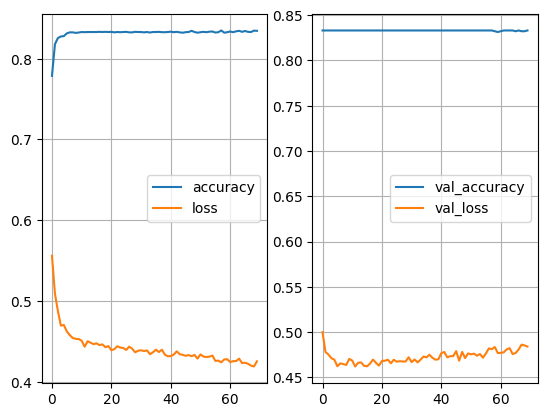

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].plot(dnn_clf_history.epoch, dnn_clf_history.history['accuracy'], label='accuracy')
ax[0].plot(dnn_clf_history.epoch, dnn_clf_history.history['loss'], label='loss')
ax[0].legend()
ax[0].grid(True)
ax[1].plot(dnn_clf_history.epoch, dnn_clf_history.history['val_accuracy'], label='val_accuracy')
ax[1].plot(dnn_clf_history.epoch, dnn_clf_history.history['val_loss'], label='val_loss')
ax[1].legend()
ax[1].grid(True)

#### Make Prediction on Test Data

In [ ]:
test_data.head(1)

,ID,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income
0,70607,LP002560,1,1,0,1,0,15890,871.075952,188,371,1,1,6000


In [ ]:
test_data_clean = test_data.drop(['ID', 'Loan_ID', ], axis=1)

In [ ]:
test_data_preprocessed = Preprocessing(test_data_clean).preprocess()
test_data_preprocessed.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.302551,0.447001,-0.665747,2.725191,-0.339308,0.945257,-0.171285,0.871045,0.233460,0.279354,-0.299439,0.362843
1,0.302551,0.447001,-0.665747,-0.366947,2.947172,-0.130651,-0.160078,-0.756359,0.274786,-3.579694,-0.299439,0.362843
2,-3.305227,-2.237130,-0.665747,-0.366947,-0.339308,0.018113,-0.301600,-0.756359,0.274786,0.279354,-0.299439,0.362843
3,0.302551,0.447001,-0.665747,-0.366947,-0.339308,-0.874123,-0.551981,1.432547,-0.221134,0.279354,1.099787,0.362843
4,0.302551,0.447001,-0.665747,-0.366947,-0.339308,0.075098,-0.551981,-0.756359,-7.184678,0.279354,1.099787,-0.643381


In [ ]:
test_data_pred = np.squeeze(np.round(dnn_clf.predict(test_data_preprocessed))).astype(int)

79/79 [==============================] - 0s 2ms/step


In [ ]:
test_data_pred

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
submission_df = pd.DataFrame({'ID': test_data['ID'], 'Loan_Status': test_data_pred})
submission_df.to_csv(project_dir+'/Submission/submission3.csv', index=False)
submission_df

,ID,Loan_Status
0,70607,1
1,58412,1
2,88755,1
3,97271,1
4,70478,1
...,...,...
2523,15578,1
2524,87689,1
2525,42584,1
2526,44709,1


### DNN - 2

In [18]:
dnn_clf2 = keras.models.Sequential([
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid')
])

dnn_clf2.compile(loss=keras.losses.BinaryCrossentropy(),
                optimizer=keras.optimizers.Adam(),
                metrics=['accuracy'])

dnn_clf_history2 = dnn_clf2.fit(x=X_train,
                              y=y_train,
                              epochs=70,
                              batch_size=32,
                              validation_data=[X_test, y_test])

keras.saving.save_model(dnn_clf2, project_dir+'/Output/dnn_clf3.keras')

Epoch 1/70
148/148 [==============================] - 2s 5ms/step - loss: 0.5494 - accuracy: 0.7783 - val_loss: 0.4932 - val_accuracy: 0.8331
Epoch 2/70
148/148 [==============================] - 1s 3ms/step - loss: 0.5080 - accuracy: 0.8186 - val_loss: 0.4613 - val_accuracy: 0.8331
Epoch 3/70
148/148 [==============================] - 1s 4ms/step - loss: 0.4873 - accuracy: 0.8253 - val_loss: 0.4550 - val_accuracy: 0.8331
Epoch 4/70
148/148 [==============================] - 1s 4ms/step - loss: 0.4753 - accuracy: 0.8287 - val_loss: 0.4552 - val_accuracy: 0.8331
Epoch 5/70
148/148 [==============================] - 1s 4ms/step - loss: 0.4690 - accuracy: 0.8313 - val_loss: 0.4549 - val_accuracy: 0.8331
Epoch 6/70
148/148 [==============================] - 1s 5ms/step - loss: 0.4708 - accuracy: 0.8298 - val_loss: 0.4542 - val_accuracy: 0.8331
Epoch 7/70
148/148 [==============================] - 1s 6ms/step - loss: 0.4573 - accuracy: 0.8323 - val_loss: 0.4553 - val_accuracy: 0.8331
Epoch 

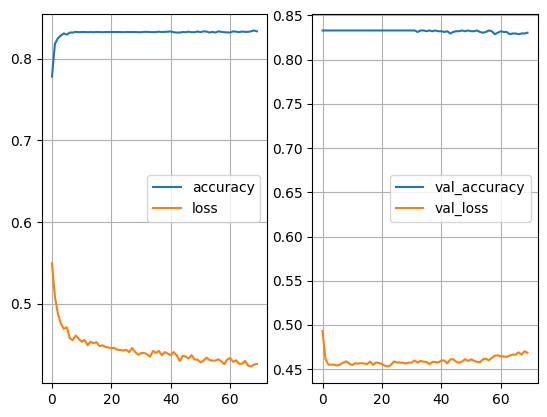

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].plot(dnn_clf_history2.epoch, dnn_clf_history2.history['accuracy'], label='accuracy')
ax[0].plot(dnn_clf_history2.epoch, dnn_clf_history2.history['loss'], label='loss')
ax[0].legend()
ax[0].grid(True)
ax[1].plot(dnn_clf_history2.epoch, dnn_clf_history2.history['val_accuracy'], label='val_accuracy')
ax[1].plot(dnn_clf_history2.epoch, dnn_clf_history2.history['val_loss'], label='val_loss')
ax[1].legend()
ax[1].grid(True)

#### Make Prediction on Test Data

In [ ]:
test_data.head(1)

,ID,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income
0,70607,LP002560,1,1,0,1,0,15890,871.075952,188,371,1,1,6000


In [ ]:
test_data_clean = test_data.drop(['ID', 'Loan_ID', ], axis=1)

In [ ]:
test_data_preprocessed = Preprocessing(test_data_clean).preprocess()
test_data_preprocessed.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.302551,0.447001,-0.665747,2.725191,-0.339308,0.945257,-0.171285,0.871045,0.233460,0.279354,-0.299439,0.362843
1,0.302551,0.447001,-0.665747,-0.366947,2.947172,-0.130651,-0.160078,-0.756359,0.274786,-3.579694,-0.299439,0.362843
2,-3.305227,-2.237130,-0.665747,-0.366947,-0.339308,0.018113,-0.301600,-0.756359,0.274786,0.279354,-0.299439,0.362843
3,0.302551,0.447001,-0.665747,-0.366947,-0.339308,-0.874123,-0.551981,1.432547,-0.221134,0.279354,1.099787,0.362843
4,0.302551,0.447001,-0.665747,-0.366947,-0.339308,0.075098,-0.551981,-0.756359,-7.184678,0.279354,1.099787,-0.643381


In [ ]:
test_data_pred = np.squeeze(np.round(dnn_clf2.predict(test_data_preprocessed))).astype(int)

79/79 [==============================] - 0s 2ms/step


In [ ]:
test_data_pred

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
submission_df = pd.DataFrame({'ID': test_data['ID'], 'Loan_Status': test_data_pred})
submission_df.to_csv(project_dir+'/Submission/submission4.csv', index=False)
submission_df

,ID,Loan_Status
0,70607,1
1,58412,1
2,88755,1
3,97271,1
4,70478,1
...,...,...
2523,15578,1
2524,87689,1
2525,42584,1
2526,44709,1


### NB: Two DNN Models are trained here, the last, which is DNN2 gave the best result.

## Performance Evaluation

In [20]:
dnn_clf3_pred = np.squeeze(np.round(dnn_clf2.predict(X_test))).astype(int)

37/37 [==============================] - 0s 2ms/step


In [21]:
dnn_clf3_pred

array([1, 1, 1, ..., 1, 1, 1])

In [25]:
print(classification_report(y_test, dnn_clf3_pred));

              precision    recall  f1-score   support

           0       0.20      0.01      0.01       197
           1       0.83      1.00      0.91       983

    accuracy                           0.83      1180
   macro avg       0.52      0.50      0.46      1180
weighted avg       0.73      0.83      0.76      1180



In [27]:
np.unique(dnn_clf3_pred)

array([0, 1])

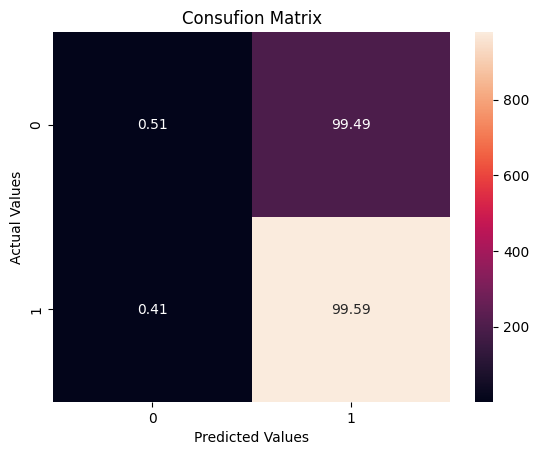

In [30]:
plt.figure()
plt.title('Consufion Matrix')
cm = confusion_matrix(y_test, dnn_clf3_pred)
cm_percentage = cm / cm.sum(axis=1)[:, np.newaxis] * 100
sns.heatmap(cm, annot=cm_percentage, fmt='.2f')
plt.xlabel('Predicted Values');
plt.ylabel('Actual Values');
plt.show();